In [1]:
import glob
import pickle
from pathlib import Path
import numpy as np
import networkx as nx
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import progressbar
import copy
from operator import itemgetter
import progressbar
import pandas as pd
import sklearn as sk

# Let's load features from pandas dataframe

Precomputed by `code/aggregate_smooth_and_compute_features.py`

In [2]:
df_data = pd.read_pickle("../data/allresults.p")

In [3]:
df_data.describe()

,nauts_log,nauts_log_ged_1,nauts_log_ged_2,nnodes,norbits,norbits_ged_1,norbits_ged_2,p,shannon_entropy,shannon_entropy_ged_1,shannon_entropy_ged_2
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,3.350284,2.388032,2.146890,14.051020,9.414966,11.118346,11.556209,7.295918,0.880321,0.425892,0.359234
std,7.737100,6.840159,6.152720,4.225001,7.037533,5.637768,5.442127,4.533250,1.076288,0.650033,0.583431
min,0.000000,0.000000,0.000000,3.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.006374,11.000000,2.000000,7.000000,8.006410,4.000000,0.000000,0.000000,0.001115
50%,0.693147,0.185866,0.179790,14.000000,10.000000,11.309524,11.940217,6.000000,0.138629,0.097518,0.079928
75%,2.995732,0.850248,1.004538,18.000000,16.000000,16.000000,15.993861,9.000000,1.834234,0.614998,0.489747
max,42.335616,39.339884,37.088592,22.000000,20.000000,20.000000,20.000000,25.000000,3.091042,2.670649,2.543476


In [4]:
X = df_data[[
    'nauts_log',
    'nauts_log_ged_1',
    'nauts_log_ged_2',
    'nnodes',
    'norbits',
    'norbits_ged_1',
    'norbits_ged_2',
    'shannon_entropy',
    'shannon_entropy_ged_1',
    'shannon_entropy_ged_2',
]].to_numpy()
Y = df_data['p'].to_numpy()
c = df_data['class'].to_numpy()

# Let's compute the coefficient of correlation between p that we are trying to predict and features

In [5]:
from scipy.stats import pearsonr, spearmanr
for feature in [
    'nauts_log',
    'nauts_log_ged_1',
    'nauts_log_ged_2',
    'nnodes',
    'norbits',
    'norbits_ged_1',
    'norbits_ged_2',
    'shannon_entropy',
    'shannon_entropy_ged_1',
    'shannon_entropy_ged_2',
]:
    r_p, p_p = pearsonr(df_data[feature], df_data['p'])
    r_s, p_s = spearmanr(df_data[feature], df_data['p'])
    print(f"For {feature:<25}: Pearson: r={r_p:+.5f} p={p_p:.5f}, Spearman: r={r_s:+.5f}\t p={p_s:.5f}")
#     print(f"{feature:<25} & {r_p:+.5f} & {p_p:.5f} \\\\")

For nauts_log                : Pearson: r=-0.36397 p=0.00000, Spearman: r=-0.44805	 p=0.00000
For nauts_log_ged_1          : Pearson: r=-0.32851 p=0.00000, Spearman: r=-0.35044	 p=0.00000
For nauts_log_ged_2          : Pearson: r=-0.30854 p=0.00000, Spearman: r=-0.31966	 p=0.00000
For nnodes                   : Pearson: r=+0.37075 p=0.00000, Spearman: r=+0.39255	 p=0.00000
For norbits                  : Pearson: r=+0.39314 p=0.00000, Spearman: r=+0.45849	 p=0.00000
For norbits_ged_1            : Pearson: r=+0.44326 p=0.00000, Spearman: r=+0.53974	 p=0.00000
For norbits_ged_2            : Pearson: r=+0.43035 p=0.00000, Spearman: r=+0.52370	 p=0.00000
For shannon_entropy          : Pearson: r=-0.32295 p=0.00000, Spearman: r=-0.37247	 p=0.00000
For shannon_entropy_ged_1    : Pearson: r=-0.36913 p=0.00000, Spearman: r=-0.38689	 p=0.00000
For shannon_entropy_ged_2    : Pearson: r=-0.34254 p=0.00000, Spearman: r=-0.36580	 p=0.00000


# Plot all features

In [6]:
colorscheme = {   
    "rand3reg" : 'r',
    "rand4reg" : 'pink',
    "rand5reg" : 'coral',
    "trivial" : 'g',
    "cycle" : 'darkgreen',
    "complete" : 'orange',
    "ladder" : 'xkcd:bright blue',
    "circular_ladder" : 'xkcd:royal blue',
    "grid_2d" : 'xkcd:pale blue',
    "star_graph" : 'xkcd:goldenrod',
    "wheel" : 'xkcd:pale yellow',
    "antiprism" : 'xkcd:cerulean',
    'hand-picked' : 'b',
}

colors = list(colorscheme[x] for x in c)

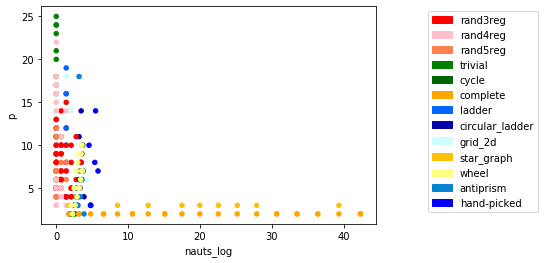

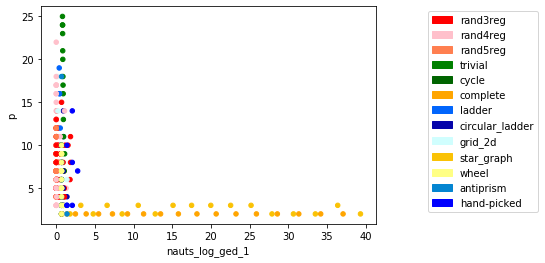

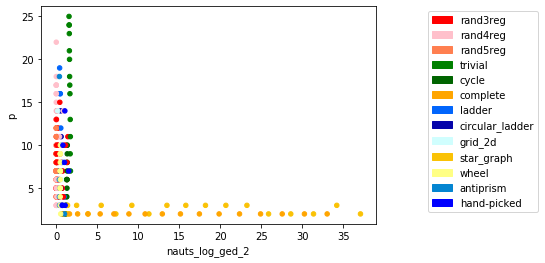

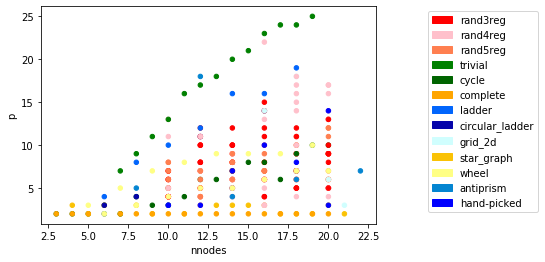

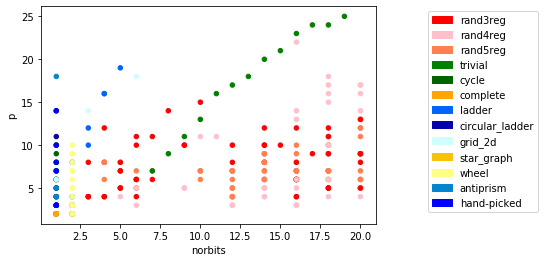

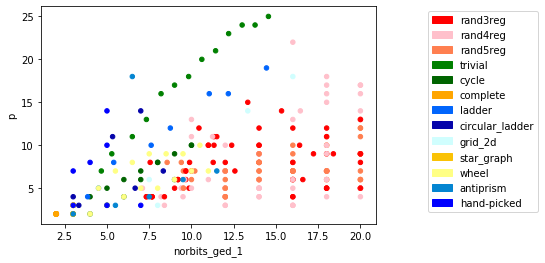

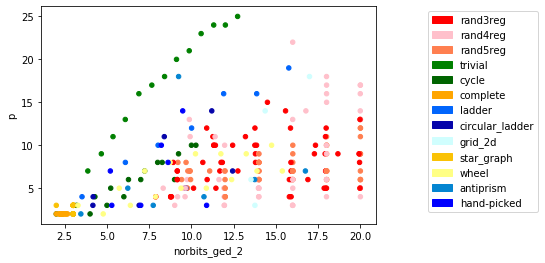

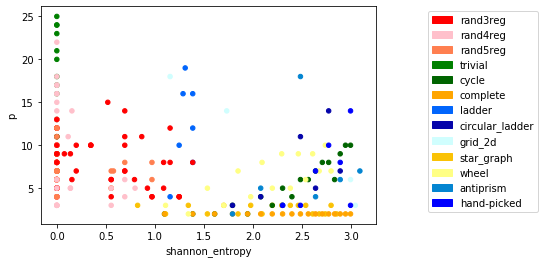

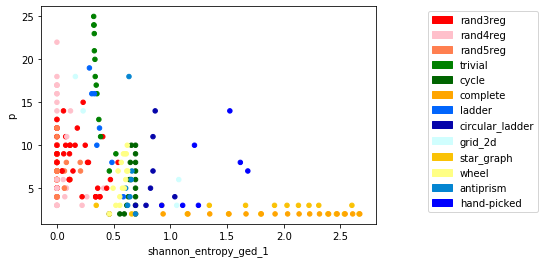

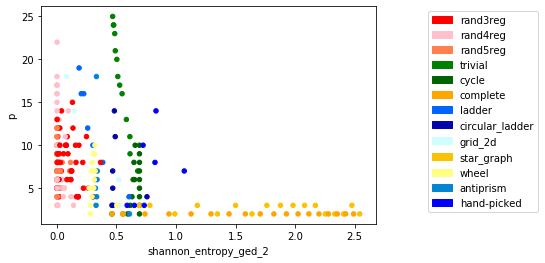

In [7]:
import matplotlib.patches as mpatches
for feature in [
    'nauts_log',
    'nauts_log_ged_1',
    'nauts_log_ged_2',
    'nnodes',
    'norbits',
    'norbits_ged_1',
    'norbits_ged_2',
    'shannon_entropy',
    'shannon_entropy_ged_1',
    'shannon_entropy_ged_2',
]:
    df_data.plot.scatter(feature, 'p', c=colors)
    legend_elem = [mpatches.Patch(color=color,label=method) for method, color in colorscheme.items()]
    plt.legend(handles=legend_elem, bbox_to_anchor=(1.5, 1))
    plt.show()

In [8]:
# TBA
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = [
    {
        'C': [100, 200, 250, 300, 400, 500], 
        'gamma': [0.01, 0.01, 0.001, 0.0001, 'scale'], 
        'epsilon':[0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
        'kernel': ['rbf']
    },
]

X_train, X_test, y_train, y_test, c_train, c_test = train_test_split(X, Y, c, test_size=0.3, random_state=42, stratify=c)

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

svr = SVR()
cv = skf.split(np.zeros(len(c_train)), c_train)
clf = GridSearchCV(svr, param_grid, scoring='neg_median_absolute_error', cv=cv)
clf.fit(X_train_scaled, y_train)

print(f"Best score: {clf.best_score_}")
train_predict = clf.predict(X_train_scaled)
train_score = median_absolute_error(y_train, train_predict)

X_test_scaled = scaler.transform(X_test)
test_predict = clf.predict(X_test_scaled)
test_score = median_absolute_error(y_test, test_predict)

print(f"Score on train: {train_score}, score on test: {test_score}")

/home/rshaydu/soft/anaconda3/envs/variationaltoolkit/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best score: -1.29589716298499
Score on train: 0.7261334784645594, score on test: 1.3714973850760277


In [9]:
clf.best_params_

{'C': 200, 'epsilon': 0.4, 'gamma': 'scale', 'kernel': 'rbf'}

# Let's check the correlation

In [10]:
import scipy
scipy.stats.pearsonr(y_test, test_predict)

(0.7718459521734162, 8.503643548884456e-19)

# Pretty good!

# Now, we can visualize the fitted model

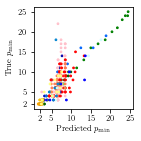

In [14]:
X_scaled = scaler.transform(X)
s = clf.predict(X_scaled)
plt.scatter(s, Y, c=list(colorscheme[x] for x in c), s=3)
plt.xlabel("Predicted $p_{\min}$")
plt.ylabel("True $p_{\min}$")
plt.xticks([2,5,10,15,20,25])
plt.yticks([2,5,10,15,20,25])

from matplotlib import rc
## use \showthe\font to check the font in Latex! https://tex.stackexchange.com/questions/109703/how-to-determine-the-font-being-used-by-a-latex-document
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern Roman'], 'size':8})
#rc('font',**{'size':10})

fig = plt.gcf()
fig.set_size_inches(2, 2)

plt.tight_layout()
plt.show()

# Let's try n "cut-off" classifiers

We train 12 "cutoff" classifiers. Each classifier answers the question whether the output is below or above the cutoff. We also fit scalers to the decision function values of the classifiers on the training data. These scalers are later used to scale the decision function values on the testing data to enable us to directly compare the decision function values for different classifiers.

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score


scaler = StandardScaler()
X_train, X_test, y_train, y_test, c_train, c_test = train_test_split(X, Y, c, test_size=0.3, random_state=42, stratify=c)

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

cutoff_classifiers = dict()
cutoff_scalers = dict()

for cutoff in range(3,15):
    bins = [0, cutoff, int(max(Y))+1]
    y_train_class = np.digitize(y_train, bins)
    y_test_class = np.digitize(y_test, bins)

    params = {'C': 400, 'gamma': 'scale', 'kernel': 'rbf', 'decision_function_shape':'ovo'}
    svc = SVC(**params)
    svc.fit(X_train_scaled, y_train_class)

    train_predict = svc.predict(X_train_scaled)
    train_score = f1_score(y_train_class, train_predict)

    X_test_scaled = scaler.transform(X_test)
    test_predict = svc.predict(X_test_scaled)
    test_score = f1_score(y_test_class, test_predict)
    
    decision_function_scaler = StandardScaler(with_mean=False)
    decision_function_scaler.fit(svc.decision_function(X_train_scaled).reshape(-1,1))

    print(f"For cutoff {cutoff}, score on train: {train_score}, score on test: {test_score}")
    print(sk.metrics.classification_report(y_test_class, test_predict))
    cutoff_classifiers[cutoff] = copy.deepcopy(svc)
    cutoff_scalers[cutoff] = copy.deepcopy(decision_function_scaler)

For cutoff 3, score on train: 0.975609756097561, score on test: 0.7200000000000001
              precision    recall  f1-score   support

           1       0.64      0.82      0.72        11
           2       0.97      0.94      0.95        78

    accuracy                           0.92        89
   macro avg       0.81      0.88      0.84        89
weighted avg       0.93      0.92      0.93        89

For cutoff 4, score on train: 0.9295774647887323, score on test: 0.7804878048780488
              precision    recall  f1-score   support

           1       0.89      0.70      0.78        23
           2       0.90      0.97      0.93        66

    accuracy                           0.90        89
   macro avg       0.90      0.83      0.86        89
weighted avg       0.90      0.90      0.89        89

For cutoff 5, score on train: 0.8235294117647057, score on test: 0.7843137254901961
              precision    recall  f1-score   support

           1       0.91      0.69      0

# To predict, fit a quadratic function to the decision functions of all cutoff classifiers and look at the intersection with zero

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from operator import itemgetter

def in_interval(x, a,b):
    return x >= a and x <= b

def roots_of_quadratic(a,b,c):
    if (b**2 - 4*a*c) >= 0:
        x1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
        x2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
        return np.array([x1, x2])
    else:
        return np.array([-np.inf, np.inf])

def predict_from_cutoff_fit_function(cutoff_classifiers, X, cutoffs=np.array(list(range(3,15)))):
    decision_f = [cutoff_scalers[cutoff].transform(cutoff_classifiers[cutoff].decision_function(np.array([x])).reshape(-1, 1))[0][0]
                                 for cutoff in cutoffs]

    polynomial_features= PolynomialFeatures(degree=2)
    cutoffs_quad = polynomial_features.fit_transform(cutoffs.reshape(-1,1))
    fitted_function = LinearRegression(copy_X=True).fit(cutoffs_quad, decision_f)
    
    assert(len(fitted_function.coef_) == 3)
    a = fitted_function.coef_[2]
    b = fitted_function.coef_[1]
    c = fitted_function.coef_[0]+fitted_function.intercept_
    
    intersection_with_zero = roots_of_quadratic(a,b,c)
    intersections_in_limits = np.array([in_interval(x, 0, max(cutoffs)) for x in intersection_with_zero])
    assert(sum(intersections_in_limits) <= 2)
    if sum(intersections_in_limits) == 0:
        if all(np.array(decision_f) < 0) or (sum(np.array(decision_f) > 0) < 2):
            res = min(cutoffs)
        elif all(np.array(decision_f) > 0) or (sum(np.array(decision_f) < 0) < 2):
            res = max(cutoffs)
        else:
            raise ValueError("Could not resolve quadratic function")
    elif sum(intersections_in_limits) == 2:
        res = np.mean(intersection_with_zero)
    else: 
        res = intersection_with_zero[intersections_in_limits][0]
    
    return res

y_predict = []
y_test_truncated = list(y if y < 14 else 14 for y in y_test)
for i,(x,y) in enumerate(zip(X_test_scaled, y_test_truncated)):
    try:
        predicted = predict_from_cutoff_fit_function(cutoff_classifiers, x)
    except (AssertionError,UnboundLocalError) as e:
        print(i, x, y)
        raise e
#     print(f"{i}: predicted: {predicted}, true:{y}")
    y_predict.append(predicted)
median_absolute_error(y_test_truncated, y_predict)

1.3545918746073045

In [17]:
correct = np.where(np.array(y_test_truncated) == np.array(y_predict))[0]
overshoot = np.where(np.array(y_test_truncated) < np.array(y_predict))[0]
undershoot = np.where(np.array(y_test_truncated) > np.array(y_predict))[0]
print(f"Exactly correct: {len(correct)}, predicted higher p than true: {len(overshoot)}, predicted lower p than true: {len(undershoot)}")

Exactly correct: 5, predicted higher p than true: 47, predicted lower p than true: 37


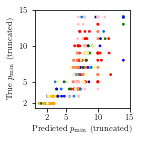

In [18]:
X_scaled = scaler.transform(X)

y_truncated = list(y if y < 14 else 14 for y in Y)
s = []
for x in X_scaled:
    s.append(predict_from_cutoff_fit_function(cutoff_classifiers, x))

plt.scatter(s, y_truncated, c=list(colorscheme[x] for x in c), s=3)
plt.xlabel("Predicted $p_{\min}$ (truncated)")
plt.ylabel("True $p_{\min}$ (truncated)")
plt.xticks([2,5,10,15])
plt.yticks([2,5,10,15])

from matplotlib import rc
## use \showthe\font to check the font in Latex! https://tex.stackexchange.com/questions/109703/how-to-determine-the-font-being-used-by-a-latex-document
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern Roman'], 'size':8})
#rc('font',**{'size':10})

fig = plt.gcf()
fig.set_size_inches(2, 2)

plt.tight_layout()
plt.show()

# We can visualize the process

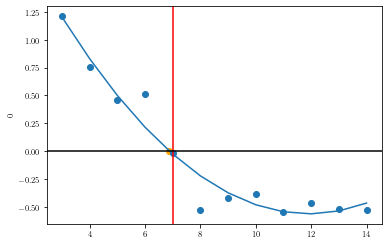

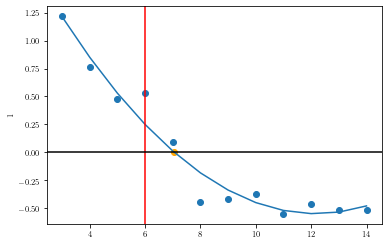

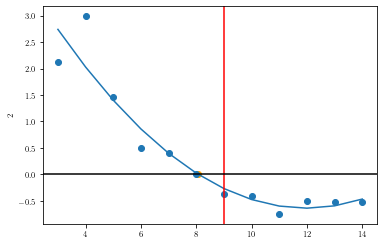

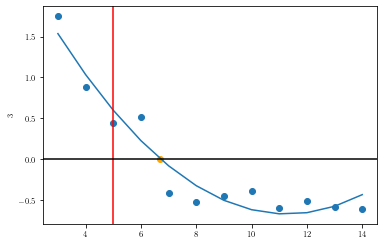

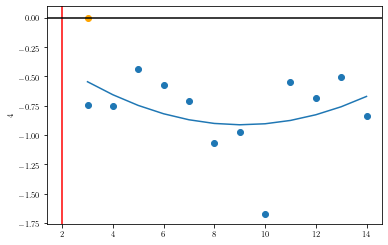

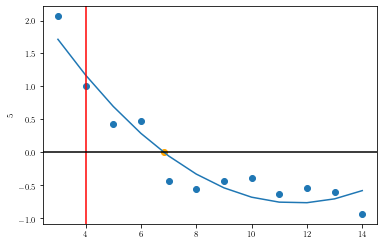

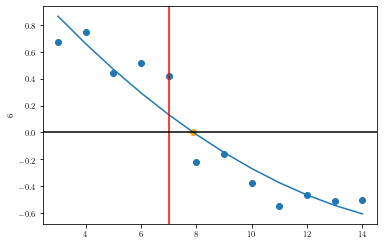

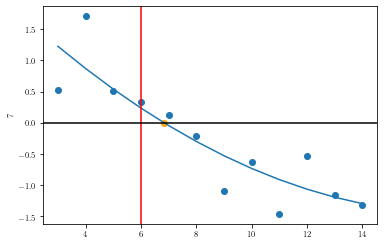

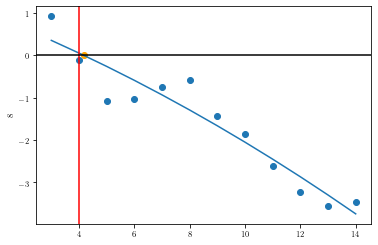

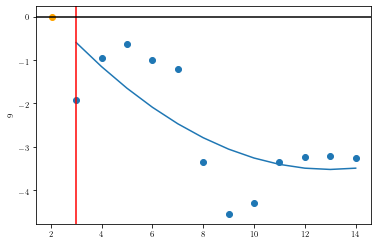

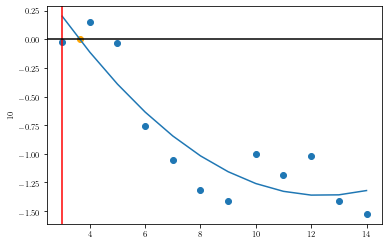

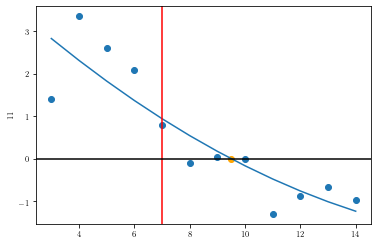

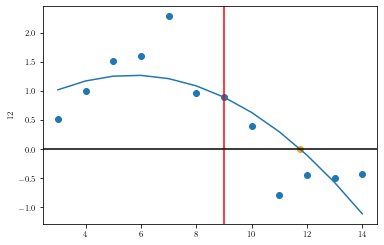

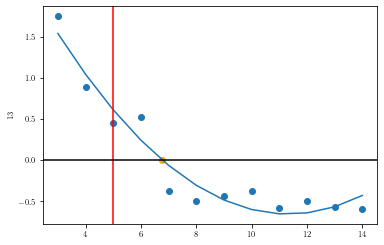

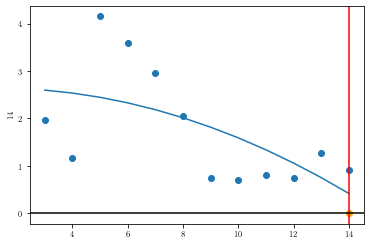

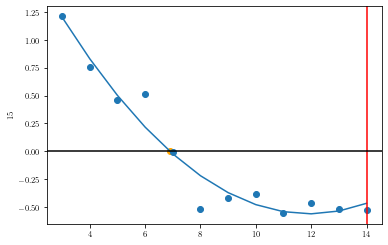

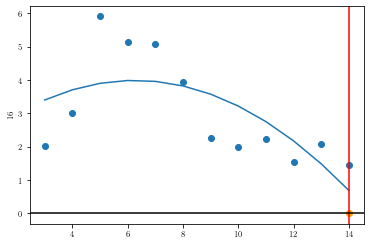

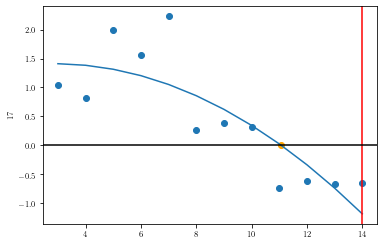

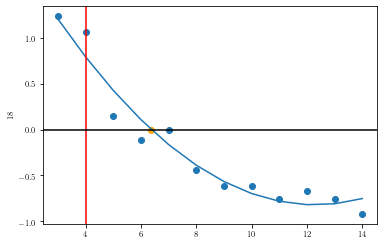

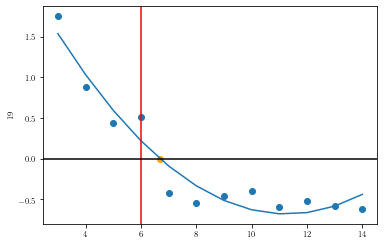

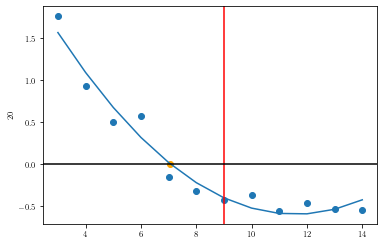

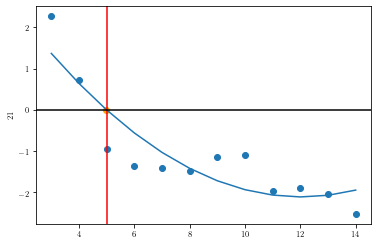

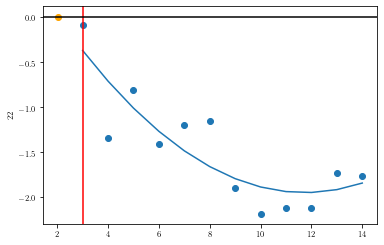

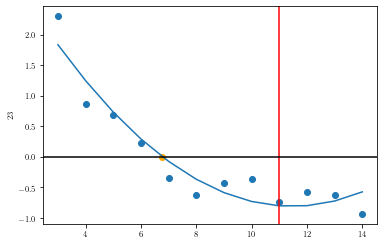

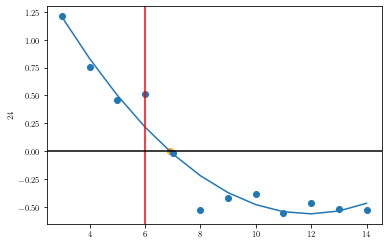

In [19]:
cutoffs=np.array(list(range(3,15)))
for i,(x,y) in enumerate(zip(X_test_scaled[:25], y_test_truncated[:25])):
    decision_f = [cutoff_scalers[cutoff].transform(cutoff_classifiers[cutoff].decision_function(np.array([x])).reshape(-1, 1))[0][0]
                                 for cutoff in cutoffs]
#     decision_f = [cutoff_classifiers[cutoff].decision_function(np.array([x]))[0] for cutoff in cutoffs]

    polynomial_features= PolynomialFeatures(degree=2)
    cutoffs_quad = polynomial_features.fit_transform(cutoffs.reshape(-1,1))
    fitted_function = LinearRegression(copy_X=True).fit(cutoffs_quad, decision_f)
    
    assert(len(fitted_function.coef_) == 3)
    a = fitted_function.coef_[2]
    b = fitted_function.coef_[1]
    c = fitted_function.coef_[0]+fitted_function.intercept_
    
    intersection_with_zero = roots_of_quadratic(a,b,c)
    intersections_in_limits = np.array([in_interval(x, 0, max(cutoffs)) for x in intersection_with_zero])
    assert(sum(intersections_in_limits) <= 2)
    if sum(intersections_in_limits) == 0:
        if all(np.array(decision_f) < 0) or (sum(np.array(decision_f) > 0) < 2):
            res = min(cutoffs)
        elif all(np.array(decision_f) > 0) or (sum(np.array(decision_f) < 0) < 2):
            res = max(cutoffs)
        else:
            raise ValueError("Could not resolve quadratic function")
    elif sum(intersections_in_limits) == 2:
        res = np.mean(intersection_with_zero)
    else: 
        res = intersection_with_zero[intersections_in_limits][0]
    
    plt.scatter(res, 0,color='orange')
    
    decision_f_predict = fitted_function.predict(cutoffs_quad)
    
    plt.scatter(cutoffs, decision_f)
    plt.plot(cutoffs, decision_f_predict)
    plt.axvline(y, color='red')
    plt.axhline(0, color='k')
    plt.ylabel(i)
    plt.show()